# RED-TILING
This notebook will contains all the code to analyze the red tiling inputs and the results.

# Solver

In [16]:
from script import *
import subprocess

data_folder = "resources/"
solver_folder = "solvers/"

# Select database here
data_file = "input_pdf.db"
# Select solver here
solver_file = "basicSolver.lp"

data = f"{data_folder}{data_file}"
solver = f"{solver_folder}{solver_file}"

## 1. Input

We will start by loading the input puzzle and displaying it.

Instance input_pdf.db:
n = 6, m = 4


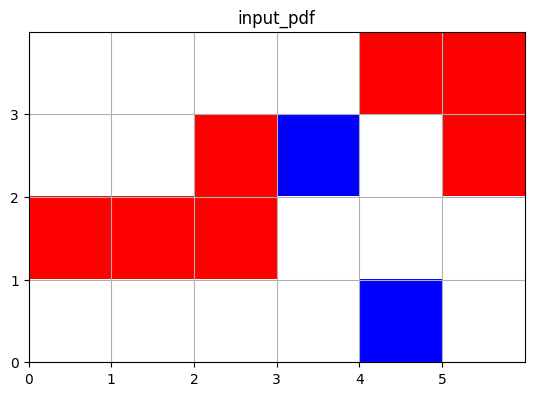

In [17]:
# print the database instance
print(f"Instance {data_file}:")
board, pieces = read_db_file(data)
display_board(board, data_file)

Then, we will display the available pieces.

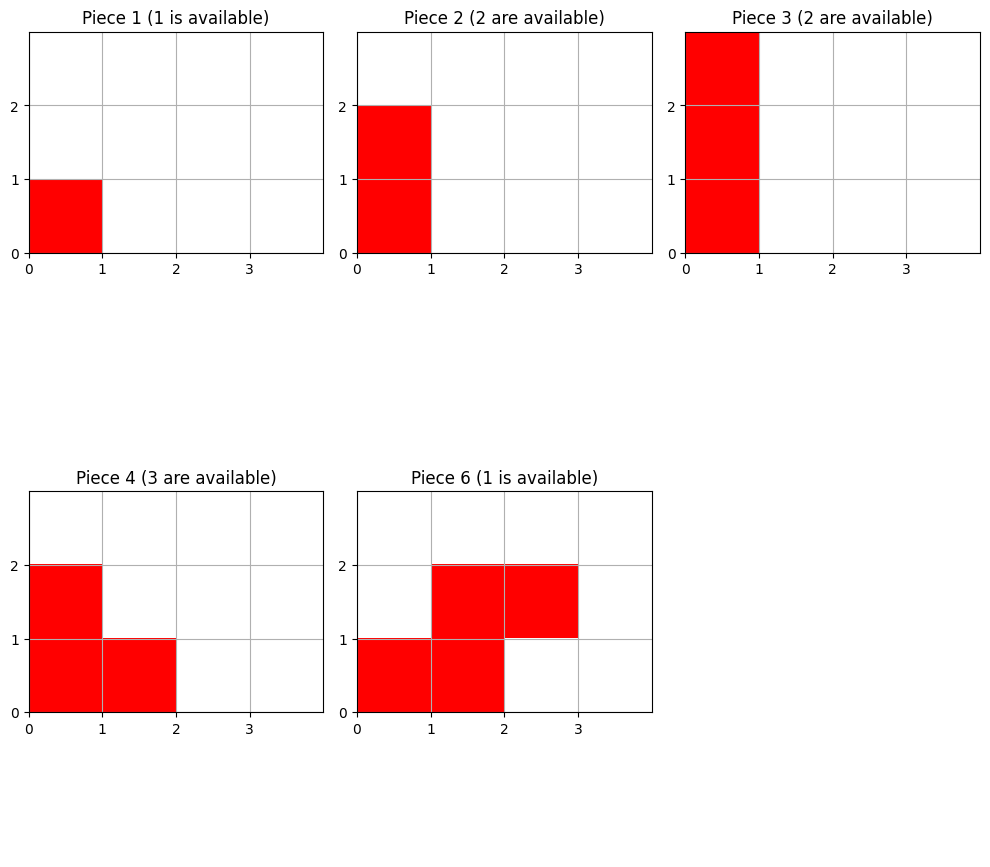

In [18]:
display_pieces(pieces)

## 2. Solution
Here, we will call clingo and find the solution to the puzzle.

- If there is a solution, we will display it. (If there are multiple solutions, we will display the first one and mention the number of solutions)
- If there is no solution, we will display a message saying unsat.

Solving...
Solution found:


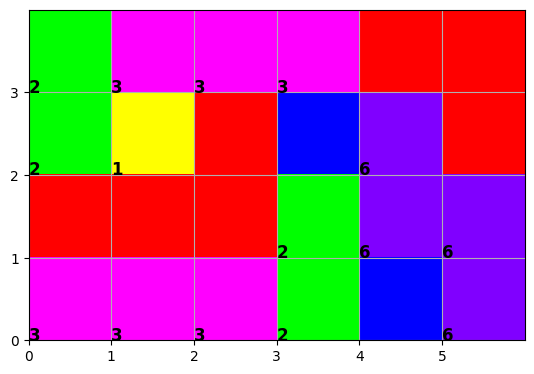

In [19]:
command = f"clingo {solver} {data} --verbose=0"

print("Solving...")
output = subprocess.run(command.split(), capture_output=True, text=True)

output = output.stdout    

if "UNSATISFIABLE" in output:
    print("No solution found.")
else:
    # Print the solution
    print("Solution found:")
    solutions = output.split("\n")[0].split(" ")

    new_board = add_solutions_to_board(board, solutions)

    display_board(new_board, "")


# Generator 

## 1. parametrized generator

In [20]:
import time

input = "genInput.db"
gen = "param_generator.lp"

seed = int(time.time())

generator = f"{solver_folder}/{gen}"
gen_input = f"{data_folder}/{input}"

['blue(-1,-1)', 'red(-1,-1)', 'params(5,5,2)', 'two_sol(2,0,3,1,3,2)', 'two_sol(2,0,3,3,3,4)', 'two_sol(2,90,1,4,2,4)', 'three_sol(3,0,1,1,1,2,1,3)', 'four_sol(8,90,4,2,4,3,5,3,6,3)', 'four_sol(8,270,2,0,3,0,4,0,4,1)', 'four_sol(11,0,0,1,0,2,0,3,0,4)', 'blue(1,0)', 'blue(3,1)', 'red(0,0)', 'red(1,0)', 'red(2,1)', 'red(2,2)', 'red(2,3)', 'red(4,4)']


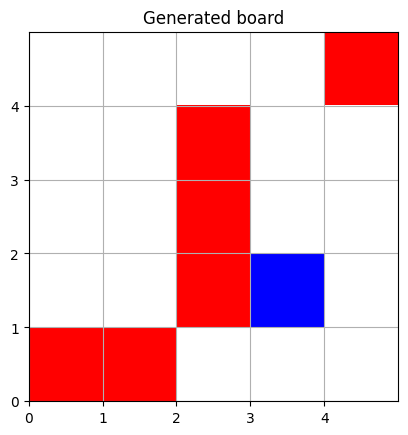

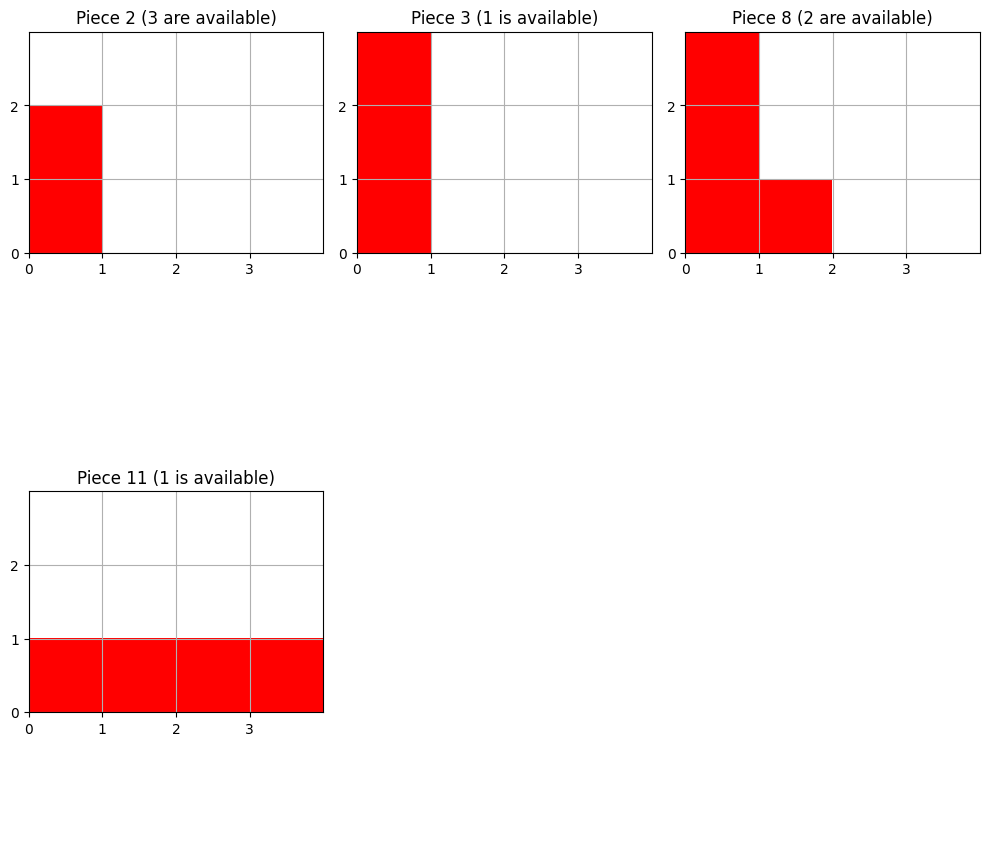

In [21]:
command = f"clingo -n 1 --rand-freq=1 --seed={seed} {generator} {gen_input}  --verbose=0"

output = subprocess.run(command.split(), capture_output=True, text=True)
output = output.stdout

if "UNSATISFIABLE" in output or "UNKOWN" in output:
    print("An error occured.")
else:
    predicates = output.split("\n")[0].split(" ")
    print(predicates)

    board, pieces, solver_input = read_generated_board(predicates)
    
    display_board(board, "Generated board")

    display_pieces(pieces)

## 2. Random generator

In [22]:
random_gen = "random_generator.lp"
seed = int(time.time())

random_generator = f"{solver_folder}/{random_gen}"

['blue(-1,-1)', 'red(-1,-1)', 'params(4,3,3)', 'one_sol(1,3,2)', 'two_sol(2,90,0,2,1,2)', 'three_sol(3,90,0,0,1,0,2,0)', 'three_sol(4,0,1,1,2,1,2,2)', 'red(0,1)', 'red(3,0)', 'red(3,1)']


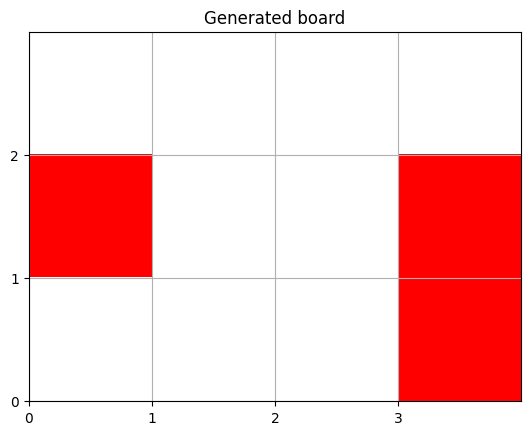

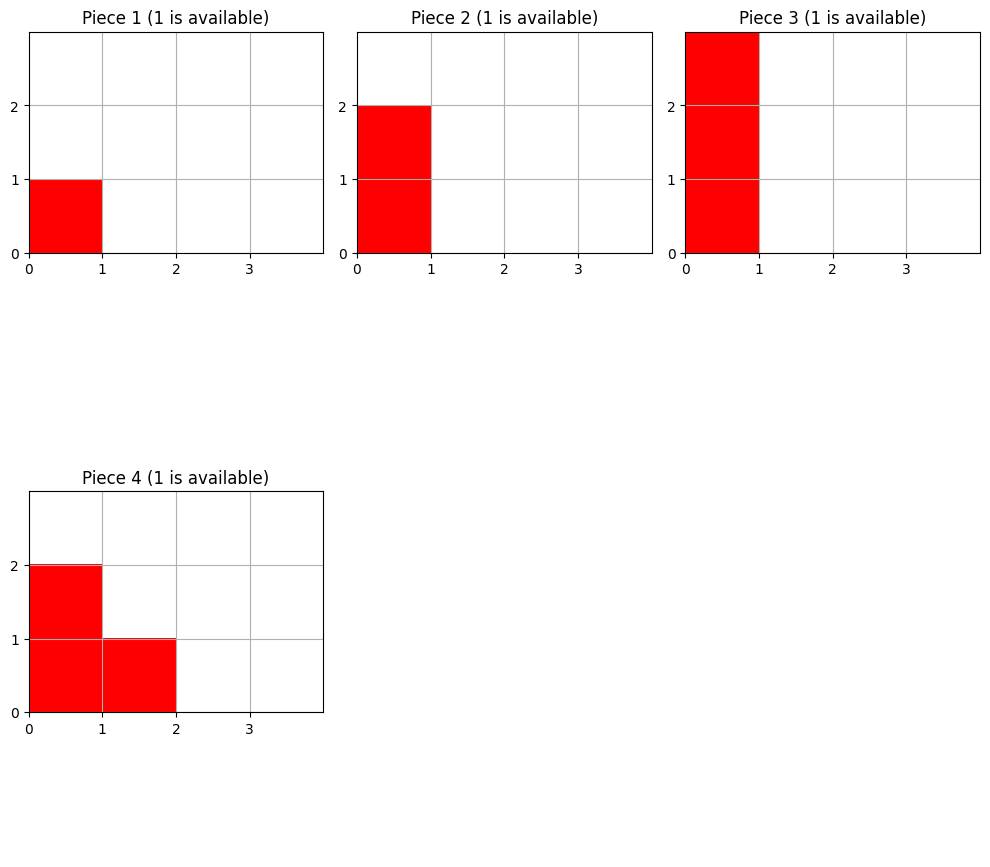

In [28]:
command = (
    f"clingo -n 1 --rand-freq=1 --seed={seed} {random_generator}  --verbose=0"
)

output = subprocess.run(command.split(), capture_output=True, text=True)
output = output.stdout

if "UNSATISFIABLE" in output or "UNKOWN" in output:
    print("An error occured.")
else:
    predicates = output.split("\n")[0].split(" ")
    print(predicates)

    board, pieces, solver_input = read_generated_board(predicates)

    display_board(board, "Generated board")

    display_pieces(pieces)

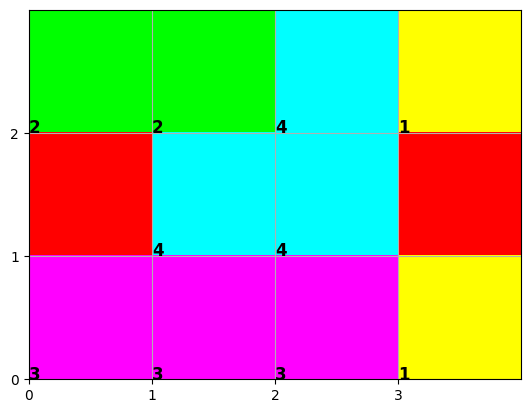

In [27]:
new_board = add_solutions_to_board(board, predicates)

display_board(new_board, "")